In [1]:
# By: Fady Motir 

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cifar10-python/cifar-10-python.tar.gz
/kaggle/input/cifar10-python/cifar-10-batches-py/data_batch_1
/kaggle/input/cifar10-python/cifar-10-batches-py/data_batch_2
/kaggle/input/cifar10-python/cifar-10-batches-py/batches.meta
/kaggle/input/cifar10-python/cifar-10-batches-py/test_batch
/kaggle/input/cifar10-python/cifar-10-batches-py/data_batch_3
/kaggle/input/cifar10-python/cifar-10-batches-py/data_batch_5
/kaggle/input/cifar10-python/cifar-10-batches-py/data_batch_4
/kaggle/input/cifar10-python/cifar-10-batches-py/readme.html


In [8]:
# Importing Libraries 
import tensorflow as tf  
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10
 
# Distribute it to train and test set
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

170498071/170498071 [==============================] - 5s 0us/step
(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [4]:
# Reduce pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0
 
# flatten the label values
y_train, y_test = y_train.flatten(), y_test.flatten()

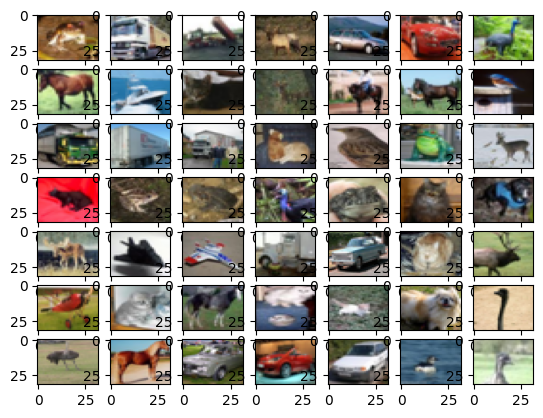

In [7]:
# visualize data by plotting images
fig, ax = plt.subplots(7, 7)
k = 0
 
for i in range(7):
    for j in range(7):
        ax[i][j].imshow(x_train[k], aspect='auto')
        k += 1
 
plt.show()

In [10]:
# number of classes
classNum = len(set(y_train))

# calculate total number of classes 
# for output layer
print("number of classes:", classNum)

# input layer
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)

# Hidden layer
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)

# last hidden layer i.e.. output layer
x = Dense(classNum, activation='softmax')(x)

model = Model(i, x)

# model description
model.summary()


number of classes: 10
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_6 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_7 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 16,

In [12]:
# Compile
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
# Fit
modelFitting = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50)

Epoch 1/50
1563/1563 [==============================] - 23s 7ms/step - loss: 1.3847 - accuracy: 0.5197 - val_loss: 1.1296 - val_accuracy: 0.6098
Epoch 2/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9264 - accuracy: 0.6766 - val_loss: 0.9684 - val_accuracy: 0.6606
Epoch 3/50
1563/1563 [==============================] - 10s 7ms/step - loss: 0.7617 - accuracy: 0.7355 - val_loss: 0.8177 - val_accuracy: 0.7200
Epoch 4/50
1563/1563 [==============================] - 10s 7ms/step - loss: 0.6509 - accuracy: 0.7753 - val_loss: 0.8347 - val_accuracy: 0.7196
Epoch 5/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.5569 - accuracy: 0.8076 - val_loss: 0.6868 - val_accuracy: 0.7702
Epoch 6/50
1563/1563 [==============================] - 10s 7ms/step - loss: 0.4776 - accuracy: 0.8346 - val_loss: 0.6804 - val_accuracy: 0.7819
Epoch 7/50
1563/1563 [==============================] - 10s 7ms/step - loss: 0.4048 - accuracy: 0.8605 - val_loss: 0.6397 - val_ac

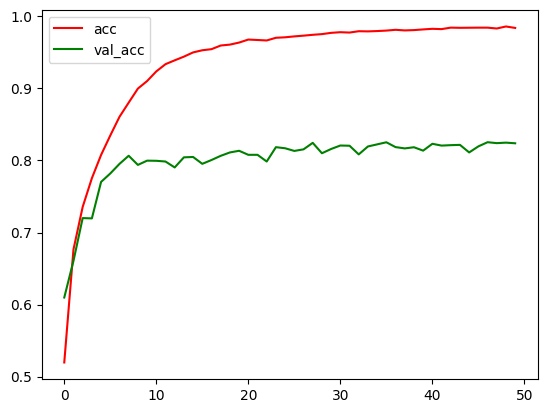

In [16]:
# Plot accuracy per iteration
plt.plot(modelFitting.history['accuracy'], label='acc', color='red')
plt.plot(modelFitting.history['val_accuracy'], label='val_acc', color='green')
plt.legend()

1/1 [==============================] - 0s 19ms/step
Original label is Cat and predicted label is Cat


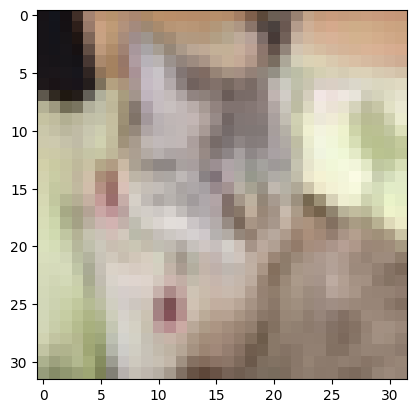

In [33]:
# label mapping

labels = '''Airplane Automobile Bird Cat Deerdog Frog Horseship Truck'''.split()

# select the image from our test dataset
image_number = 8

# display the image
plt.imshow(x_test[image_number])

# load the image in an array
n = np.array(x_test[image_number])

# reshape it
p = n.reshape(1, 32, 32, 3)

# pass in the network for prediction and 
# save the predicted label
predicted_label = labels[model.predict(p).argmax()]

# load the original label
original_label = labels[y_test[image_number]]

# display the result
print("Original label is {} and predicted label is {}".format(
original_label, predicted_label))


In [34]:
# save the model
model.save('CIFAR-10 Image Classification.h5')